In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import anndata as ad
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os
sys.path.append('/home/BS94_SUR/phD/review/utils')
import anndata_loading_preprocessing
from anndata_loading_preprocessing import read_dscigm_datasets
import scipy.stats as stats
import math
import random

In [2]:
path_folder = '/home/BS94_SUR/phD/review/datasets/cell clustering'
dataset_name = 'muraro'
col = True
column_name = None

In [3]:
adata = read_dscigm_datasets(path_folder, dataset_name, col, column_name)
#adata.var = adata.var.reset_index(names=['genes'])
adata

/opt/conda/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 2126 × 2799
    obs: 'Unnamed: 0', 'Cell Type'

In [4]:
#df = pd.DataFrame(adata.X, columns=adata.var.genes.values)
df = df = pd.DataFrame(adata.X)
df

0         1         2         3     4         5         6     \
0     0.000000  0.000000  0.000000  0.000000   0.0  0.000000  0.000000   
1     0.000000  0.000000  0.000000  0.000000   0.0  1.799971  0.694126   
2     0.000000  0.000000  0.000000  0.000000   0.0  0.000000  0.000000   
3     0.000000  0.000000  0.000000  1.101227   0.0  0.000000  0.000000   
4     1.799971  0.000000  0.000000  1.390714   0.0  0.000000  1.390714   
...        ...       ...       ...       ...   ...       ...       ...   
2121  0.000000  0.000000  0.000000  0.000000   0.0  1.101227  0.000000   
2122  0.000000  1.390714  1.615734  1.956063   0.0  1.101227  0.694126   
2123  1.101227  0.000000  0.694126  0.000000   0.0  0.000000  1.101227   
2124  0.000000  0.000000  0.000000  0.694126   0.0  0.000000  0.000000   
2125  0.000000  0.000000  0.000000  1.390714   0.0  1.101227  0.000000   

          7         8         9     ...      2789      2790      2791  2792  \
0     2.211310  0.694126  0.000000  ...  0.000000  0.000000  0.000000   0.0   
1     0.000000  0.000000  1.615734  ...  0.000000  0.000000  1.101227   0.0   
2     1.956063  0.000000  0.000000  ...  0.694126  1.101227  0.000000   0.0   
3     0.000000  0.000000  1.101227  ...  0.000000  0.000000  0.694126   0.0   
4     0.000000  0.000000  1.615734  ...  1.956063  1.101227  0.000000   0.0   
...        ...       ...       ...  ...       ...       ...       ...   ...   
2121  0.000000  0.000000  0.694126  ...  0.000000  0.000000  0.694126   0.0   
2122  0.000000  0.000000  1.799971  ...  0.000000  0.000000  0.000000   0.0   
2123  0.000000  0.000000  1.615734  ...  1.390714  0.694126  0.694126   0.0   
2124  0.000000  1.101227  0.694126  ...  0.000000  0.000000  0.000000   0.0   
2125  0.000000  0.000000  1.101227  ...  0.000000  0.000000  1.390714   0.0   

      2793      2794      2795      2796  2797      2798  
0      0.0  0.000000  0.000000  0.000000   0.0  0.000000  
1      0.0  0.000000  0.694126  0.694126   0.0  0.694126  
2      0.0  0.000000  0.000000  0.000000   0.0  0.000000  
3      0.0  0.000000  0.000000  0.000000   0.0  0.000000  
4      0.0  0.000000  1.390714  0.000000   0.0  1.799971  
...    ...       ...       ...       ...   ...       ...  
2121   0.0  0.000000  0.000000  0.000000   0.0  0.000000  
2122   0.0  0.000000  1.101227  0.000000   0.0  1.101227  
2123   0.0  0.000000  1.390714  0.694126   0.0  1.101227  
2124   0.0  0.000000  0.000000  0.000000   0.0  0.000000  
2125   0.0  0.694126  0.000000  0.694126   0.0  0.000000  

[2126 rows x 2799 columns]

# Zeros Visualization

In [5]:
genes = df.columns.tolist()

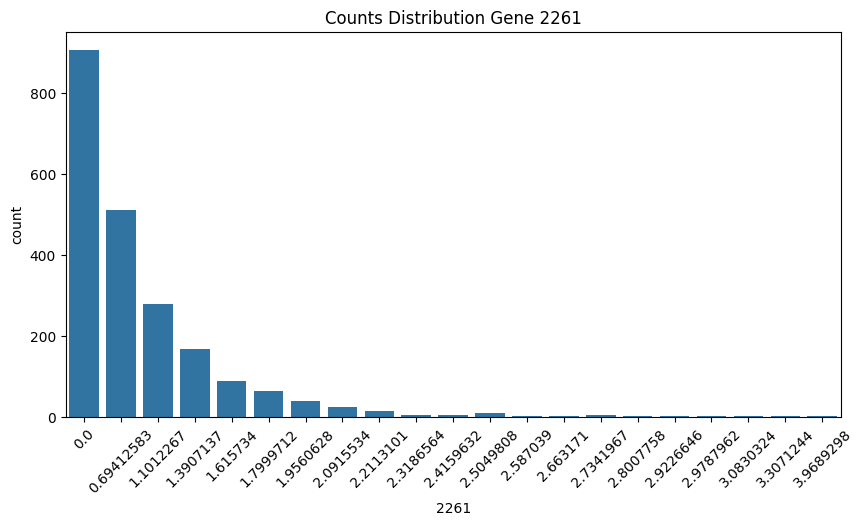

In [6]:
gene = random.choice(genes)
plt.figure(figsize=(10, 5))
sns.barplot(df[gene].sort_values(ascending=True).value_counts())
plt.xticks(rotation=45)
plt.title(f'Counts Distribution Gene {gene}')
plt.show()

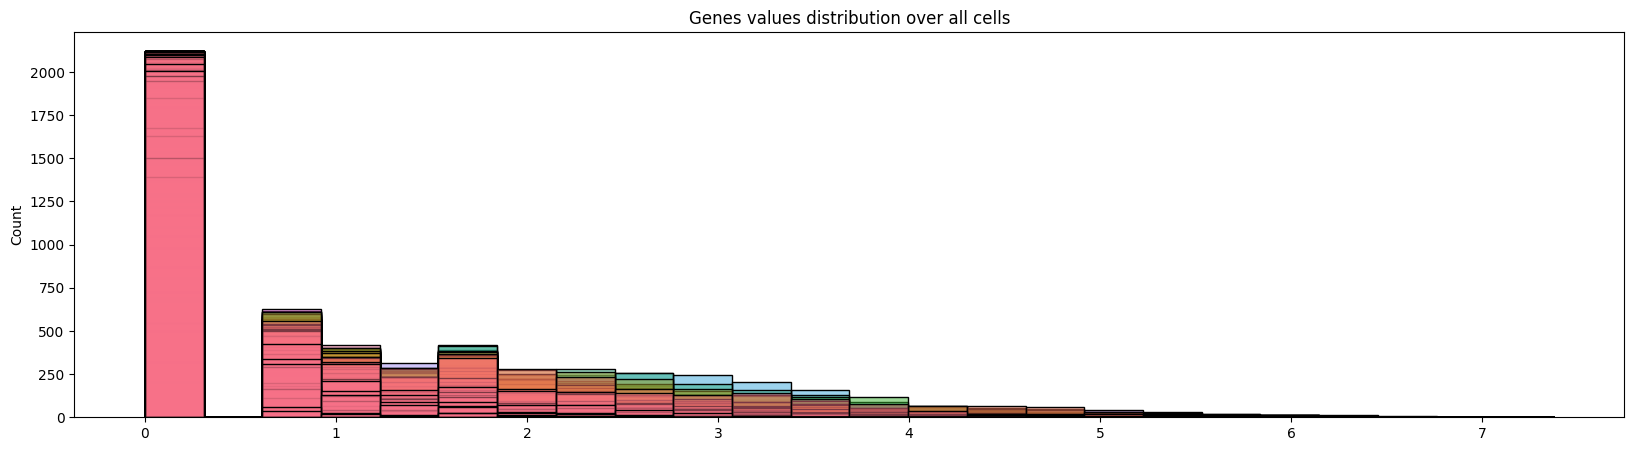

In [7]:
plt.figure(figsize=(20, 5))
sns.histplot(df, legend=False)
plt.title('Genes values distribution over all cells')
plt.show()

# Gene expression analysis

In [43]:
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=None)

/opt/conda/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:74: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


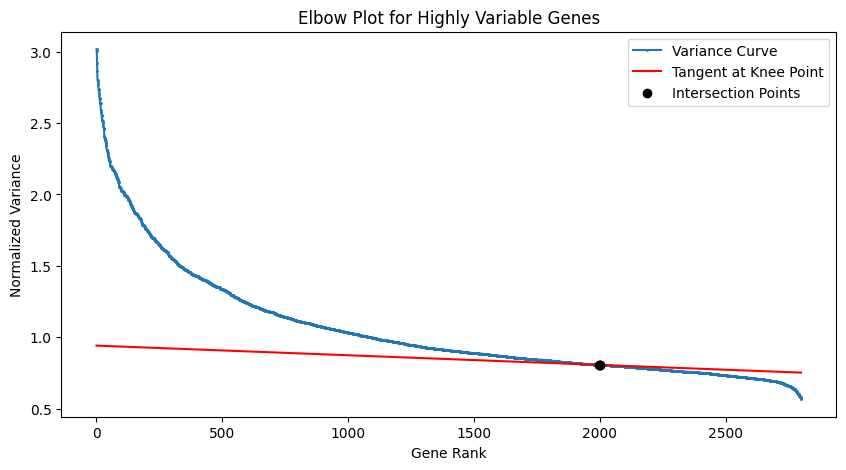

Intersection points (Gene Rank, Variance):
Gene Rank: 1998, Variance: 0.8077351865308018
Gene Rank: 1999, Variance: 0.807457674473254
Gene Rank: 2000, Variance: 0.8074283900578916


In [44]:
# Sort genes by variance
sorted_var = np.sort(adata.var["variances_norm"])[::-1]
gene_ranks = np.arange(1, len(sorted_var) + 1)

dydx = np.gradient(sorted_var) 
knee_point = 2000  
slope_at_knee = dydx[knee_point - 1] 
x0 = knee_point
y0 = sorted_var[knee_point - 1]
m = slope_at_knee
tangent_line = m * (gene_ranks - x0) + y0

diff = sorted_var - tangent_line
intersections = np.where(np.diff(np.sign(diff)))[0]

# Plot
plt.figure(figsize=(10, 5))


plt.plot(gene_ranks, sorted_var, marker="o", linestyle="-", markersize=1, label="Variance Curve")
plt.plot(gene_ranks, tangent_line, color="red", label="Tangent at Knee Point")
plt.scatter(gene_ranks[intersections], sorted_var[intersections], color='black', zorder=5, label="Intersection Points")


plt.xlabel("Gene Rank")
plt.ylabel("Normalized Variance")
plt.title("Elbow Plot for Highly Variable Genes")

plt.legend()
plt.show()

print("Intersection points (Gene Rank, Variance):")
for i in intersections:
    print(f"Gene Rank: {gene_ranks[i]}, Variance: {sorted_var[i]}")

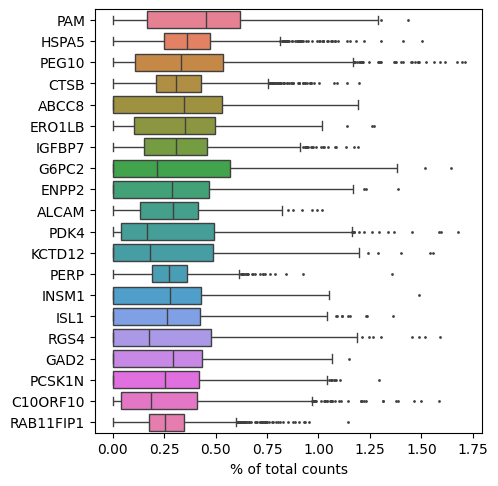

In [8]:
sc.pl.highest_expr_genes(adata, n_top=20) #show top 20 genes the top expressed accross all cells

In [9]:
genes_sums = np.array(adata.X.sum(axis=0)).flatten()
genes_names = adata.var_names
genes_df = pd.DataFrame({'gene': genes_names, 'total_expr': genes_sums})
genes_df = genes_df.sort_values(by="total_expr", ascending=False)
genes_df = genes_df.reset_index(drop=False)
genes_df.head(10)

index    gene   total_expr
0   1180   HSPA5  5057.625336
1   1801     PAM  4880.534831
2    615    CTSB  4427.169497
3   1221  IGFBP7  4082.838519
4   1857   PEG10  4056.732747
5   1863    PERP  3750.011703
6    801  ERO1LB  3731.377167
7   2191    SAT1  3694.082428
8    204  ATP1A1  3693.131388
9   2756    XBP1  3594.176386

In [10]:
genes_df.iloc[1]['index']

1801

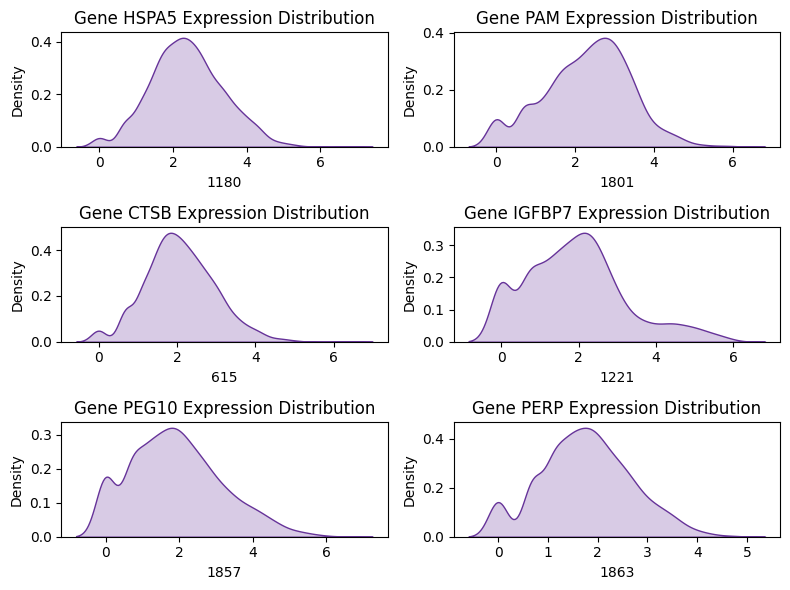

In [11]:
n_genes = 6

fig, ax = plt.subplots(3, int(n_genes/3), figsize=(8, 6))
ax = ax.flatten()

for i in range(n_genes):
    idx = genes_df.iloc[i]['index']
    gene = genes_df.iloc[i]['gene']
    sns.kdeplot(df.iloc[:, idx], fill=True, color="rebeccapurple", ax=ax[i])
    ax[i].set_title(f"Gene {gene} Expression Distribution")

plt.tight_layout()
plt.show()

In [12]:
adata.var = adata.var.reset_index(names=['genes'])
adata

AnnData object with n_obs × n_vars = 2126 × 2799
    obs: 'Unnamed: 0', 'Cell Type'
    var: 'genes'

In [13]:
genes_df

index     gene   total_expr
0      1180    HSPA5  5057.625336
1      1801      PAM  4880.534831
2       615     CTSB  4427.169497
3      1221   IGFBP7  4082.838519
4      1857    PEG10  4056.732747
...     ...      ...          ...
2794   1233     IL19     7.542384
2795   1869      PGC     7.476803
2796   1513  MADCAM1     6.822413
2797    516  CLEC10A     5.868712
2798   1017     GKN2     4.489484

[2799 rows x 3 columns]

In [14]:
adata.obs['Cell Type'].value_counts()

Cell Type
alpha          812
beta           448
ductal         245
acinar         219
delta          193
gamma          101
mesenchymal     80
endothelial     21
unclear          4
epsilon          3
Name: count, dtype: int64

<Axes: xlabel='1180', ylabel='Density'>

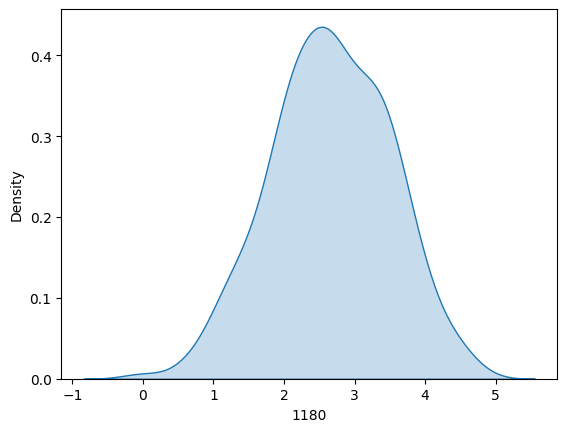

In [18]:
sns.kdeplot(pd.DataFrame(adata[adata.obs['Cell Type'] == 'ductal'].X).iloc[:, 1180], fill=True)

# Outliers filtering

In [449]:
adata.var["n_cells"] = (adata.X > 0).sum(axis=0)  # Number of cells each gene is expressed in
adata.obs["n_genes"] = (adata.X > 0).sum(axis=1)  # Number of genes expressed per cell

In [450]:
adata.var["n_cells"]

0610010F05RIK    1988
1110008P14RIK    2867
1500009C09RIK    1643
1500009L16RIK     550
1500011K16RIK    5192
                 ... 
ZRSR1            4990
ZRSR2            5162
ZWINT            5867
ZYG11B           4697
ZZZ3             3689
Name: n_cells, Length: 2228, dtype: int64

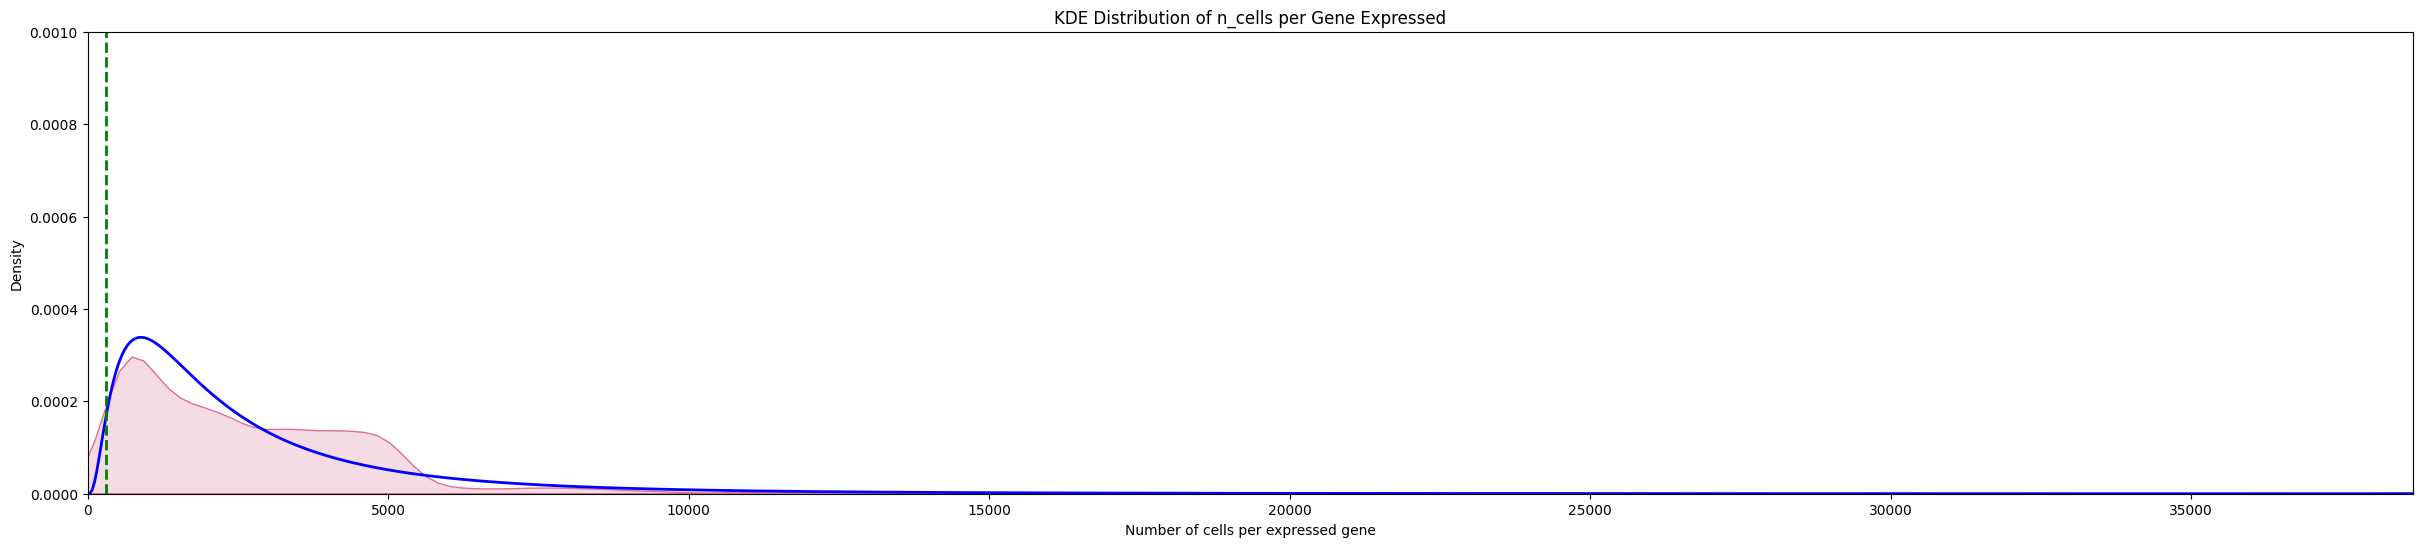

In [460]:
data = adata.var["n_cells"]
cells_filter = 300

shape, loc, scale = stats.lognorm.fit(data, floc=0)  # floc=0 ensures that the location is fixed at 0
x = np.linspace(0, data.max(), 1000)
pdf = stats.lognorm.pdf(x, shape, loc=loc, scale=scale)


plt.figure(figsize=(30, 6))
sns.kdeplot(data, fill=True, color="palevioletred", bw_adjust=0.5)
plt.plot(x, pdf, color="blue", linewidth=2, label="Fitted Log-normal")
plt.axvline(x=cells_filter, color="green", linestyle="--", linewidth=2, label=f"Crossing Point: {cells_filter:.2f}")

plt.xlim(0, data.max())  # Limit x-axis from 0 to the max value of the data
plt.ylim(0, 0.001)  # Ensure the y-axis starts at 0
plt.xlabel("Number of cells per expressed gene")
plt.ylabel("Density")
plt.title("KDE Distribution of n_cells per Gene Expressed")
plt.show()

[  0  15  56 229 270 272]
15
24.054054054054056


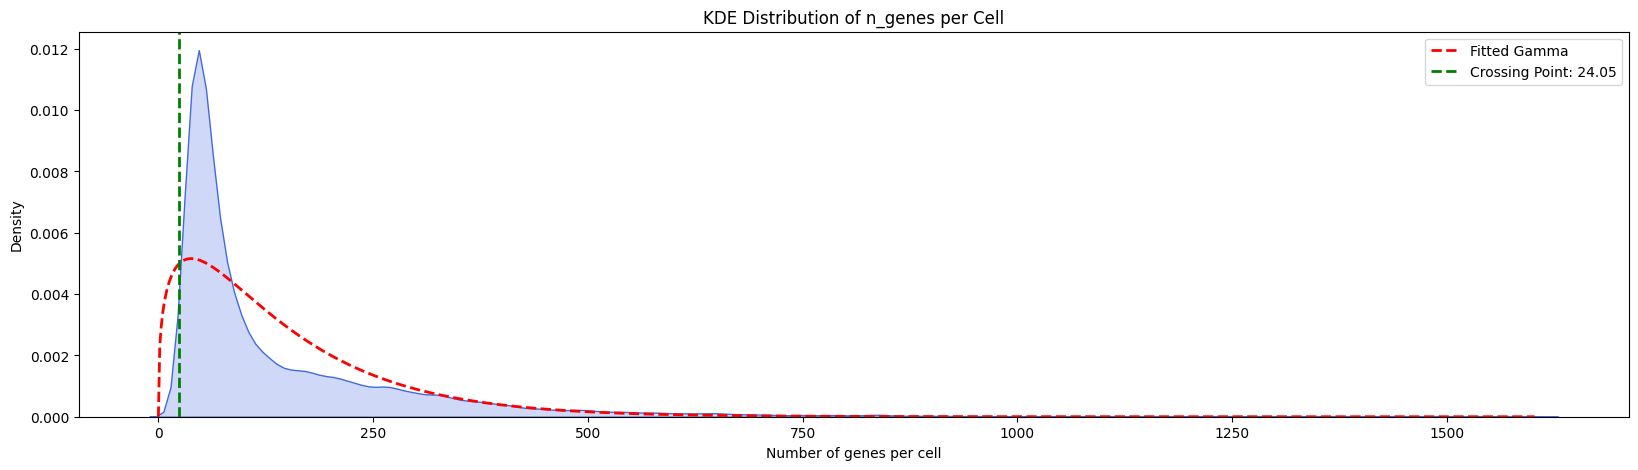

Minimum nb of cells: 25


In [461]:
data = adata.obs["n_genes"]

shape, loc, scale = stats.gamma.fit(data, floc=0)
x = np.linspace(0, data.max(), 1000)
# Calculate the Gamma PDF
pdf = stats.gamma.pdf(x, shape, loc=loc, scale=scale)

kde = stats.gaussian_kde(data)
kde_values = kde(x) 
differences = kde_values - pdf
print(np.where(np.diff(np.sign(differences)))[0])
crossing_index = np.where(np.diff(np.sign(differences)))[0][1]
print(crossing_index)
crossing_x = x[crossing_index] 
print(crossing_x)

plt.figure(figsize=(20, 5))

sns.kdeplot(data, fill=True, color="royalblue", bw_adjust=0.5)
plt.plot(x, pdf, color="red", linestyle="dashed", linewidth=2, label="Fitted Gamma")
plt.axvline(x=crossing_x, color="green", linestyle="--", linewidth=2, label=f"Crossing Point: {crossing_x:.2f}")

plt.xlabel("Number of genes per cell")
plt.ylabel("Density")
plt.title("KDE Distribution of n_genes per Cell")
plt.legend()
plt.show()

genes_filter = math.ceil(crossing_x)
print(f"Minimum nb of cells: {genes_filter}")

In [462]:
print(f"Nb of genes to be filtered: {genes_filter}")
print(f"Nb of cells to be filtered: {cells_filter}")

Nb of genes to be filtered: 25
Nb of cells to be filtered: 300


In [463]:
sc.pp.filter_cells(adata, min_genes=genes_filter)  
sc.pp.filter_genes(adata, min_cells=cells_filter) 

In [464]:
genes_sums = np.array(adata.X.sum(axis=0)).flatten()
genes_names = adata.var_names
genes_df = pd.DataFrame({'gene': genes_names, 'total_expr': genes_sums})
genes_df = genes_df.sort_values(by="total_expr", ascending=False)
genes_df = genes_df.reset_index(drop=False)
genes_df.head(10)

index     gene    total_expr
0   1634      RHO  90994.743963
1    840    GNGT1  85296.966307
2   1692      SAG  83423.726917
3   1402      PDC  67929.367917
4   1664  RPGRIP1  49133.321745
5   1606    RCVRN  49103.258229
6   1208   MT-ND1  41393.463860
7    267    CALM1  39001.938233
8    484     CST3  36188.413772
9   1175    MGARP  34661.753964

# Data Normalization For Single-Cell Data 

In [19]:
sc.pp.normalize_total(adata, target_sum=1e4)

In [20]:
sc.pp.log1p(adata)

In [21]:
pd.DataFrame(adata.X)

0         1         2         3     4         5         6     \
0     0.000000  0.000000  0.000000  0.000000   0.0  0.000000  0.000000   
1     0.000000  0.000000  0.000000  0.000000   0.0  2.684787  1.835111   
2     0.000000  0.000000  0.000000  0.000000   0.0  0.000000  0.000000   
3     0.000000  0.000000  0.000000  3.252941   0.0  0.000000  0.000000   
4     2.619744  0.000000  0.000000  2.382994   0.0  0.000000  2.382994   
...        ...       ...       ...       ...   ...       ...       ...   
2121  0.000000  0.000000  0.000000  0.000000   0.0  2.800099  0.000000   
2122  0.000000  2.355497  2.492172  2.668818   0.0  2.146732  1.751499   
2123  2.119536  0.000000  1.726070  0.000000   0.0  0.000000  2.119536   
2124  0.000000  0.000000  0.000000  3.182848   0.0  0.000000  0.000000   
2125  0.000000  0.000000  0.000000  2.508133   0.0  2.295918  0.000000   

          7         8         9     ...      2789      2790      2791  2792  \
0     3.665486  2.561227  0.000000  ...  0.000000  0.000000  0.000000   0.0   
1     0.000000  0.000000  2.584557  ...  0.000000  0.000000  2.235827   0.0   
2     3.438491  0.000000  0.000000  ...  2.459197  2.888604  0.000000   0.0   
3     0.000000  0.000000  3.252941  ...  0.000000  0.000000  2.813835   0.0   
4     0.000000  0.000000  2.520032  ...  2.697079  2.173569  0.000000   0.0   
...        ...       ...       ...  ...       ...       ...       ...   ...   
2121  0.000000  0.000000  2.373612  ...  0.000000  0.000000  2.373612   0.0   
2122  0.000000  0.000000  2.591650  ...  0.000000  0.000000  0.000000   0.0   
2123  0.000000  0.000000  2.463910  ...  2.327614  1.726070  1.726070   0.0   
2124  0.000000  3.628927  3.182848  ...  0.000000  0.000000  0.000000   0.0   
2125  0.000000  0.000000  2.295918  ...  0.000000  0.000000  2.508133   0.0   

      2793      2794      2795      2796  2797      2798  
0      0.0  0.000000  0.000000  0.000000   0.0  0.000000  
1      0.0  0.000000  1.835111  1.835111   0.0  1.835111  
2      0.0  0.000000  0.000000  0.000000   0.0  0.000000  
3      0.0  0.000000  0.000000  0.000000   0.0  0.000000  
4      0.0  0.000000  2.382994  0.000000   0.0  2.619744  
...    ...       ...       ...       ...   ...       ...  
2121   0.0  0.000000  0.000000  0.000000   0.0  0.000000  
2122   0.0  0.000000  2.146732  0.000000   0.0  2.146732  
2123   0.0  0.000000  2.327614  1.726070   0.0  2.119536  
2124   0.0  0.000000  0.000000  0.000000   0.0  0.000000  
2125   0.0  1.891756  0.000000  1.891756   0.0  0.000000  

[2126 rows x 2799 columns]

# Data Unit Variance Zero Mean

In [22]:
sc.pp.scale(adata, zero_center=True) 

In [23]:
df = pd.DataFrame(adata.X)
df

0         1         2         3         4         5         6     \
0    -0.239726 -0.267105 -0.626587 -0.704079 -0.292771 -0.544788 -0.504576   
1    -0.239726 -0.267105 -0.626587 -0.704079 -0.292771  1.794232  1.324180   
2    -0.239726 -0.267105 -0.626587 -0.704079 -0.292771 -0.544788 -0.504576   
3    -0.239726 -0.267105 -0.626587  1.706570 -0.292771 -0.544788 -0.504576   
4     4.285184 -0.267105 -0.626587  1.061880 -0.292771 -0.544788  1.870165   
...        ...       ...       ...       ...       ...       ...       ...   
2121 -0.239726 -0.267105 -0.626587 -0.704079 -0.292771  1.894692 -0.504576   
2122 -0.239726  3.619685  1.422232  1.273695 -0.292771  1.325471  1.240857   
2123  3.421208 -0.267105  0.792418 -0.704079 -0.292771 -0.544788  1.607620   
2124 -0.239726 -0.267105 -0.626587  1.654626 -0.292771 -0.544788 -0.504576   
2125 -0.239726 -0.267105 -0.626587  1.154617 -0.292771  1.455444 -0.504576   

          7         8         9     ...      2789      2790      2791  \
0     0.564404  2.372643 -0.880790  ... -0.502582 -0.703407 -0.524616   
1    -1.596615 -0.378320  1.088375  ... -0.502582 -0.703407  1.716817   
2     0.430578 -0.378320 -0.880790  ...  1.941890  1.543602 -0.524616   
3    -1.596615 -0.378320  1.597615  ... -0.502582 -0.703407  2.296275   
4    -1.596615 -0.378320  1.039214  ...  2.178348  0.987385 -0.524616   
...        ...       ...       ...  ...       ...       ...       ...   
2121 -1.596615 -0.378320  0.927657  ... -0.502582 -0.703407  1.854948   
2122 -1.596615 -0.378320  1.093779  ... -0.502582 -0.703407 -0.524616   
2123 -1.596615 -0.378320  0.996455  ...  1.811095  0.639281  1.205783   
2124 -1.596615  3.519437  1.544211  ... -0.502582 -0.703407 -0.524616   
2125 -1.596615 -0.378320  0.868462  ... -0.502582 -0.703407  1.989806   

          2792      2793      2794      2795      2796      2797      2798  
0    -0.324682 -0.193177 -0.345828 -0.844662 -0.497212 -0.284289 -0.622897  
1    -0.324682 -0.193177 -0.345828  0.601812  1.347338 -0.284289  1.027307  
2    -0.324682 -0.193177 -0.345828 -0.844662 -0.497212 -0.284289 -0.622897  
3    -0.324682 -0.193177 -0.345828 -0.844662 -0.497212 -0.284289 -0.622897  
4    -0.324682 -0.193177 -0.345828  1.033665 -0.497212 -0.284289  1.732880  
...        ...       ...       ...       ...       ...       ...       ...  
2121 -0.324682 -0.193177 -0.345828 -0.844662 -0.497212 -0.284289 -0.622897  
2122 -0.324682 -0.193177 -0.345828  0.847438 -0.497212 -0.284289  1.307529  
2123 -0.324682 -0.193177 -0.345828  0.990013  1.237736 -0.284289  1.283073  
2124 -0.324682 -0.193177 -0.345828 -0.844662 -0.497212 -0.284289 -0.622897  
2125 -0.324682 -0.193177  2.072554 -0.844662  1.404274 -0.284289 -0.622897  

[2126 rows x 2799 columns]

In [32]:
adata.obs['Cell Type'].value_counts()

Cell Type
alpha          812
beta           448
ductal         245
acinar         219
delta          193
gamma          101
mesenchymal     80
endothelial     21
unclear          4
epsilon          3
Name: count, dtype: int64

<Axes: xlabel='1180', ylabel='Density'>

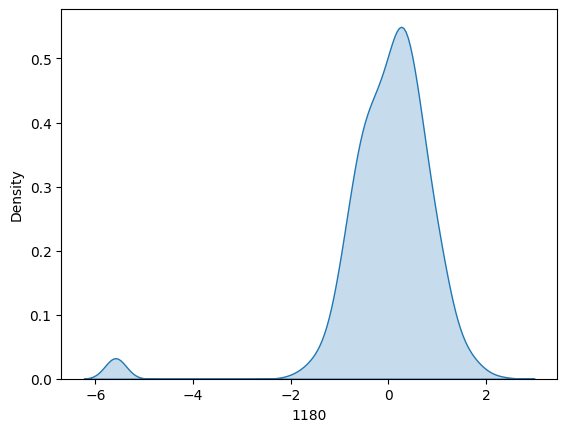

In [29]:
sns.kdeplot(pd.DataFrame(adata.X).iloc[:, 1180], fill=True)

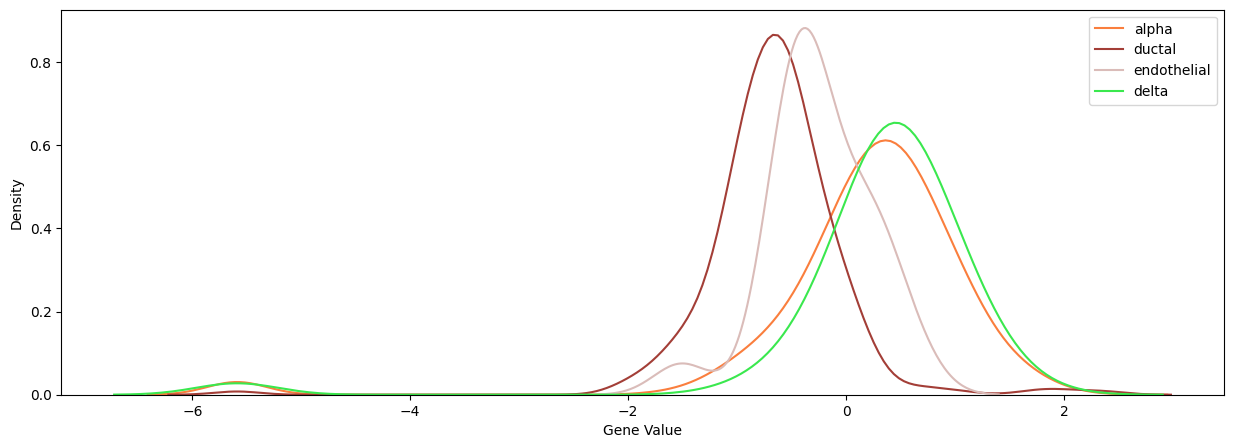

In [53]:
def random_color():
    return (random.random(), random.random(), random.random())

plt.figure(figsize=(15, 5))
for i, cell_type in enumerate(adata.obs['Cell Type'].unique()[:4]):
    sns.kdeplot(pd.DataFrame(adata[adata.obs['Cell Type'] == cell_type].X).iloc[:, 1180], fill=False, label=cell_type, color=random_color())
plt.xlabel('Gene Value')
plt.ylabel('Density')
plt.legend()
plt.show()

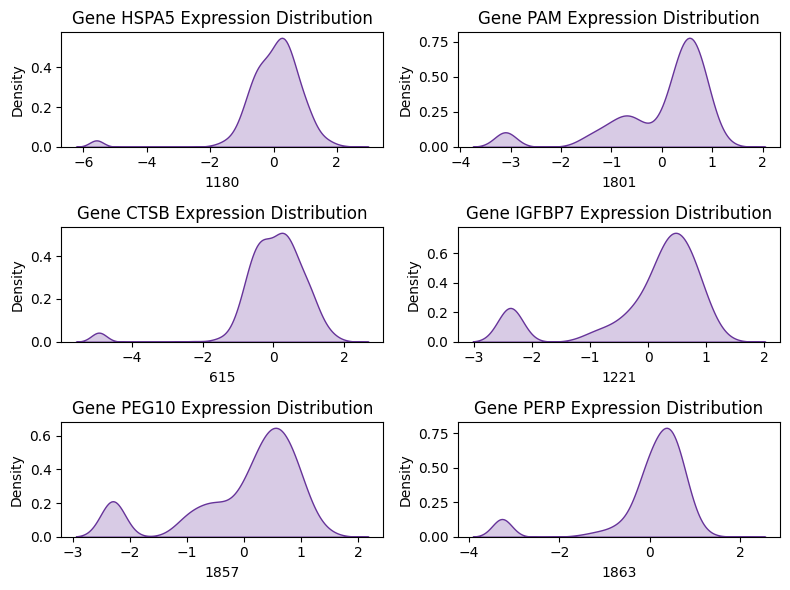

In [24]:
# Distribution for top expressed genes

n_genes = 6

fig, ax = plt.subplots(3, int(n_genes/3), figsize=(8, 6))
ax = ax.flatten()

for i in range(n_genes):
    idx = genes_df.iloc[i]['index']
    gene = genes_df.iloc[i]['gene']
    sns.kdeplot(df.iloc[:, idx], fill=True, color="rebeccapurple", ax=ax[i])
    ax[i].set_title(f"Gene {gene} Expression Distribution")

plt.tight_layout()
plt.show()

In [25]:
genes_df

index     gene   total_expr
0      1180    HSPA5  5057.625336
1      1801      PAM  4880.534831
2       615     CTSB  4427.169497
3      1221   IGFBP7  4082.838519
4      1857    PEG10  4056.732747
...     ...      ...          ...
2794   1233     IL19     7.542384
2795   1869      PGC     7.476803
2796   1513  MADCAM1     6.822413
2797    516  CLEC10A     5.868712
2798   1017     GKN2     4.489484

[2799 rows x 3 columns]

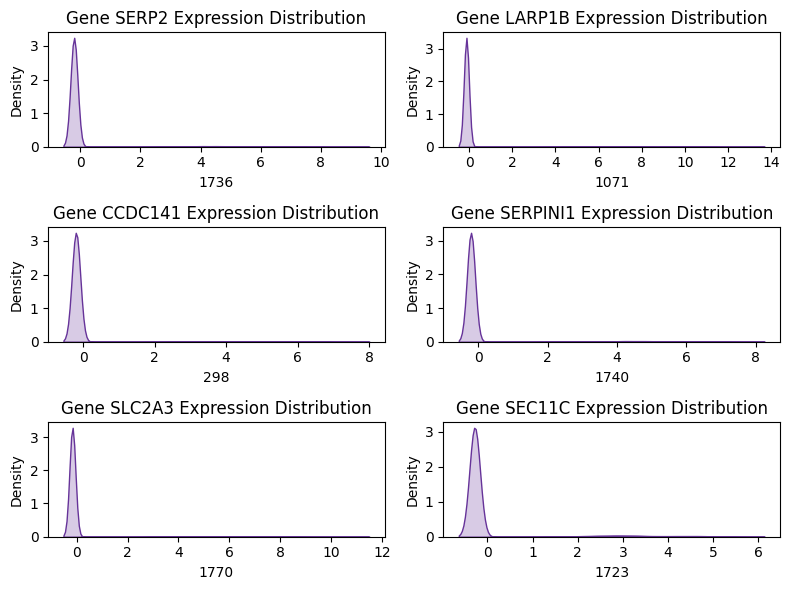

In [472]:
# Distribution for random genes
n_genes = 6
random_genes = np.random.choice(genes_df['gene'], size=n_genes, replace=False)

fig, ax = plt.subplots(3, int(n_genes/3), figsize=(8, 6))
ax = ax.flatten()

for i in range(n_genes):
    idx = genes_df[genes_df['gene'] == random_genes[i]]['index'].values[0]
    gene = genes_df[genes_df['gene'] == random_genes[i]]['gene'].values[0]
    sns.kdeplot(df.iloc[:, idx], fill=True, color="rebeccapurple", ax=ax[i])
    ax[i].set_title(f"Gene {gene} Expression Distribution")

plt.tight_layout()
plt.show()

<Axes: ylabel='Count'>

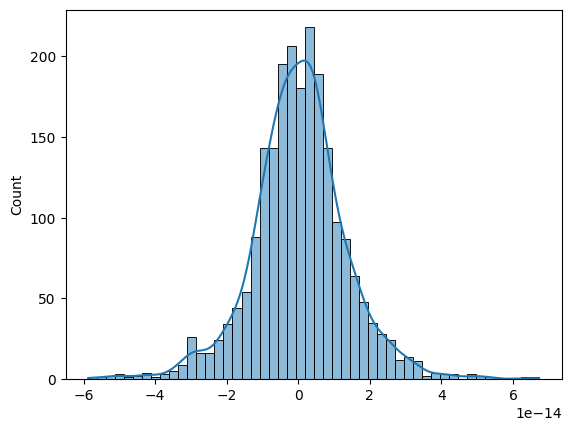

In [473]:
sns.histplot(np.mean(adata.X, axis=0), bins=50, kde=True)

In [474]:
def save_results_to_dataframe(column_names, values_dict, file_path):
    # Check if the file already exists
    if os.path.exists(file_path):
        # If the file exists, load the existing dataframe
        df = pd.read_csv(file_path)
    else:
        # If the file doesn't exist, create a new dataframe with the correct columns
        df = pd.DataFrame(columns=column_names)
    
    # Create a new row from the provided values_dict
    new_row_df = pd.DataFrame([values_dict])
    
    # Append the new row to the dataframe
    df = pd.concat([df, new_row_df], ignore_index=True)
    
    # Save the updated dataframe to the CSV file
    df.to_csv(file_path, index=False)
    
    return df


In [475]:
file_path = '/home/BS94_SUR/phD/review/hyperparameters selection/datasets_hyperparameters.csv'

columns = ['dataset_name', 'min_nb_cells_per_gene', 'min_nb_genes_per_cells']

# Define the values for the new row
values = {
    'dataset_name': dataset_name,
    'min_nb_cells_per_gene': cells_filter,
    'min_nb_genes_per_cells': genes_filter
}

df = save_results_to_dataframe(columns, values, file_path)

In [476]:
df

dataset_name  min_nb_cells_per_gene  min_nb_genes_per_cells
0       muraro                     50                     240
1      romanov                     40                     182
2     almanzar                     30                     324
3        puram                     30                     232
4      montoro                     25                     127
5  baron_human                     25                     110
6      macosko                    300                      25